# Dog Friendly Neighborhoods of NYC
## Helping New Yorkers find the best places to live or visit with their furry friends


### The focus of this project was to leverage data from NYC OpenData in order to improve the quality of life for New Yorkers.
#### For this project, I leveraged the following data sets
#### •NYC Dog Licensing https://data.cityofnewyork.us/Health/NYC-Dog-Licensing-Dataset/nu7n-tubp
#### •DOHMH Dog Bite https://data.cityofnewyork.us/Health/DOHMH-Dog-Bite-Data/rsgh-akpg
#### •Park Properties https://data.cityofnewyork.us/City-Government/Parks-Properties/k2ya-ucmv
#### •Sidewalk Café Licenses and Applications https://data.cityofnewyork.us/Business/Sidewalk-Caf-Licenses-and-Applications/qcdj-rwhu
#### •2015 Tree Census https://data.cityofnewyork.us/Environment/2015-Street-Tree-Census-Tree-Data/uvpi-gqnh

### Import and explore initial data sets

#### Dog Licensing data

In [192]:
#import the csv data into a data frame for exploration
import pandas as pd

##To test on your own system, change the path below to the location of your data set
path = '/Users/jonathan/Desktop/dsw_final/data/Dog_Licensing.csv'
doglic_df = pd.read_csv(path)

In [193]:
doglic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121949 entries, 0 to 121948
Data columns (total 15 columns):
RowNumber                  121949 non-null int64
AnimalName                 121714 non-null object
AnimalGender               121948 non-null object
AnimalBirthMonth           121948 non-null object
BreedName                  121948 non-null object
Borough                    121948 non-null object
ZipCode                    121948 non-null float64
CommunityDistrict          118612 non-null float64
CensusTract2010            118612 non-null float64
NTA                        118612 non-null object
CityCouncilDistrict        118612 non-null float64
CongressionalDistrict      118612 non-null float64
StateSenatorialDistrict    118612 non-null float64
LicenseIssuedDate          121948 non-null object
LicenseExpiredDate         121948 non-null object
dtypes: float64(6), int64(1), object(8)
memory usage: 14.0+ MB


In [194]:
#Determine if there are substantial NaNs in Zip code
doglic_df.isna().sum()

RowNumber                     0
AnimalName                  235
AnimalGender                  1
AnimalBirthMonth              1
BreedName                     1
Borough                       1
ZipCode                       1
CommunityDistrict          3337
CensusTract2010            3337
NTA                        3337
CityCouncilDistrict        3337
CongressionalDistrict      3337
StateSenatorialDistrict    3337
LicenseIssuedDate             1
LicenseExpiredDate            1
dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x136e8fe80>]],
      dtype=object)

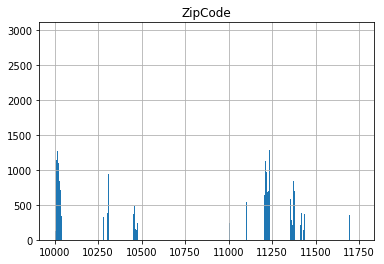

In [195]:
#explore distribution over zip codes
doglic_df.hist(column ='ZipCode',bins=range(10000,11750))

In [196]:
#Create a new column that represents the number of dogs in each zipcode
doglic_df['DogCount'] = doglic_df.groupby('ZipCode')['ZipCode'].transform('count')


In [197]:
#Look at the new column
doglic_df[['ZipCode','DogCount']].sort_values(by='DogCount', ascending=False)


,ZipCode,DogCount
107169,10025.0,2965.0
100601,10025.0,2965.0
100638,10025.0,2965.0
100634,10025.0,2965.0
100630,10025.0,2965.0
100627,10025.0,2965.0
100626,10025.0,2965.0
100617,10025.0,2965.0
100614,10025.0,2965.0
100612,10025.0,2965.0


In [198]:
#Rename the Zipcode column to Dogzip, for later use and confirm the type of new column
doglic_df.rename(columns={'ZipCode': 'DogZip'}, inplace=True)
doglic_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121949 entries, 0 to 121948
Data columns (total 16 columns):
RowNumber                  121949 non-null int64
AnimalName                 121714 non-null object
AnimalGender               121948 non-null object
AnimalBirthMonth           121948 non-null object
BreedName                  121948 non-null object
Borough                    121948 non-null object
DogZip                     121948 non-null float64
CommunityDistrict          118612 non-null float64
CensusTract2010            118612 non-null float64
NTA                        118612 non-null object
CityCouncilDistrict        118612 non-null float64
CongressionalDistrict      118612 non-null float64
StateSenatorialDistrict    118612 non-null float64
LicenseIssuedDate          121948 non-null object
LicenseExpiredDate         121948 non-null object
DogCount                   121948 non-null float64
dtypes: float64(7), int64(1), object(8)
memory usage: 14.9+ MB


In [199]:
#create new dog DF that only includes rows of unique zipcodes and their count
dog_df = doglic_df[['DogZip','DogCount']]
dog_df.drop_duplicates(subset ="DogZip", keep = 'first', inplace = True)
dog_df.sort_values(['DogCount'], ascending=False).head(10)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,DogZip,DogCount
73261,10025.0,2965.0
91588,10024.0,2368.0
69639,10023.0,2349.0
64707,10011.0,2227.0
62128,10009.0,2106.0
81453,10128.0,2094.0
33110,11215.0,2068.0
40879,11201.0,2017.0
44253,10314.0,1974.0
48600,10312.0,1800.0


#### Get park data

In [200]:
#create df of parks

##To test on your own system, change the path below to the location of your data set
path = '/Users/jonathan/Desktop/dsw_final/data/ParksProperties.csv'
parks_df = pd.read_csv(path)
parks_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2011 entries, 0 to 2010
Data columns (total 36 columns):
GISPROPNUM    2011 non-null object
OBJECTID      2011 non-null int64
the_geom      2011 non-null object
OMPPROPID     2011 non-null object
DEPARTMENT    2011 non-null object
PERMITDIST    1965 non-null object
PERMITPARE    1963 non-null object
PARENTID      2007 non-null object
LOCATION      2011 non-null object
COMMUNITYB    2011 non-null object
COUNCILDIS    2010 non-null object
PRECINCT      1978 non-null float64
ZIPCODE       2009 non-null object
BOROUGH       2011 non-null object
ACRES         2011 non-null float64
RETIRED       2011 non-null bool
EAPPLY        1930 non-null object
PIP_RATABL    1961 non-null object
GISOBJID      2011 non-null int64
CLASS         2011 non-null object
COMMISSION    1835 non-null float64
ACQUISITIO    1924 non-null float64
ADDRESS       1078 non-null object
JURISDICTI    2011 non-null object
MAPPED        2006 non-null object
PERMIT        1911

In [201]:
#Determine if there are substantial NaNs in zipcode
parks_df.isna().sum()


GISPROPNUM      0
OBJECTID        0
the_geom        0
OMPPROPID       0
DEPARTMENT      0
PERMITDIST     46
PERMITPARE     48
PARENTID        4
LOCATION        0
COMMUNITYB      0
COUNCILDIS      1
PRECINCT       33
ZIPCODE         2
BOROUGH         0
ACRES           0
RETIRED         0
EAPPLY         81
PIP_RATABL     50
GISOBJID        0
CLASS           0
COMMISSION    176
ACQUISITIO     87
ADDRESS       933
JURISDICTI      0
MAPPED          5
PERMIT        100
NAME311         1
SIGNNAME        0
SUBCATEGOR    146
TYPECATEGO      0
WATERFRONT      0
URL           106
NYS_ASSEMB      0
NYS_SENATE      0
US_CONGRES      0
GlobalID        0
dtype: int64

In [202]:
#filter down df to class park
parks_df = parks_df[parks_df['CLASS'] == 'PARK']
parks_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1902 entries, 1 to 2010
Data columns (total 36 columns):
GISPROPNUM    1902 non-null object
OBJECTID      1902 non-null int64
the_geom      1902 non-null object
OMPPROPID     1902 non-null object
DEPARTMENT    1902 non-null object
PERMITDIST    1856 non-null object
PERMITPARE    1854 non-null object
PARENTID      1898 non-null object
LOCATION      1902 non-null object
COMMUNITYB    1902 non-null object
COUNCILDIS    1901 non-null object
PRECINCT      1869 non-null float64
ZIPCODE       1900 non-null object
BOROUGH       1902 non-null object
ACRES         1902 non-null float64
RETIRED       1902 non-null bool
EAPPLY        1821 non-null object
PIP_RATABL    1852 non-null object
GISOBJID      1902 non-null int64
CLASS         1902 non-null object
COMMISSION    1727 non-null float64
ACQUISITIO    1816 non-null float64
ADDRESS       990 non-null object
JURISDICTI    1902 non-null object
MAPPED        1897 non-null object
PERMIT        1803 

In [203]:
#Create a new column for the count of parks and rename the park zip column
parks_df['ParkCount'] = parks_df.groupby('ZIPCODE')['ZIPCODE'].transform('count')
parks_df.rename(columns={'ZIPCODE': 'ParkZip'}, inplace=True)


In [204]:
#create new park DF that only includes unique zipcodes and their park count
park_df = parks_df[['ParkZip','ParkCount']]
park_df.drop_duplicates(subset ="ParkZip", keep = 'first', inplace = True)
park_df.sort_values(['ParkCount'], ascending=False).head(10)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,ParkZip,ParkCount
17,11207,55.0
3,11211,51.0
75,11201,40.0
33,11212,37.0
26,11233,35.0
57,10009,35.0
89,11206,34.0
55,10457,31.0
31,10452,30.0
173,11208,27.0


#### Get patio data

In [205]:
#create df of patio data

##To test on your own system, change the path below to the location of your data set
path = '/Users/jonathan/Desktop/dsw_final/data/patios.csv'
patios_df = pd.read_csv(path)
patios_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1551 entries, 0 to 1550
Data columns (total 47 columns):
LICENSE_NBR              1465 non-null object
LIC_STATUS               1551 non-null object
BUSINESS_NAME            1471 non-null object
BUSINESS_NAME2           1051 non-null object
BUILDING                 1551 non-null object
STREET                   1551 non-null object
CITY                     1551 non-null object
STATE                    1551 non-null object
ZIP                      1551 non-null int64
SWC_TYPE                 1551 non-null object
SWC_SQ_FT                1473 non-null float64
SWC_TABLES               1551 non-null int64
SWC_CHAIRS               1551 non-null int64
DOHMH                    1488 non-null object
LATITUDE                 1551 non-null float64
LONGITUDE                1551 non-null float64
COMMUNITY_DISTRICT       1551 non-null int64
CITY_COUNCIL_DISTRICT    1551 non-null int64
CD_URL                   1551 non-null object
APP_ID               

In [206]:
#Determine if tehre are substantial NaNs in zipcode
patios_df.isna().sum()

LICENSE_NBR                86
LIC_STATUS                  0
BUSINESS_NAME              80
BUSINESS_NAME2            500
BUILDING                    0
STREET                      0
CITY                        0
STATE                       0
ZIP                         0
SWC_TYPE                    0
SWC_SQ_FT                  78
SWC_TABLES                  0
SWC_CHAIRS                  0
DOHMH                      63
LATITUDE                    0
LONGITUDE                   0
COMMUNITY_DISTRICT          0
CITY_COUNCIL_DISTRICT       0
CD_URL                      0
APP_ID                      0
APP_SWC_TYPE                0
APP_SQ_FT                  79
APP_TABLES                  0
APP_CHAIRS                  0
APP_STATUS                  0
APP_STATUS_DATE             0
EXPIRATION_DATE           163
APP_TOO_DATE             1044
SUBMIT_DATE                 0
INTAKE                     11
INTAKE_DD                  12
DPQA                        0
SEND_PACKAGE_DD           513
CP        

In [207]:
#Create new column that contains the count of patios per zipcode
patios_df['PatioCount'] = patios_df.groupby('ZIP')['ZIP'].transform('count')
patios_df.rename(columns={'ZIP': 'PatioZip'}, inplace=True)


In [208]:
#create new DF that contains unique zip codes and their patio count
patio_df = patios_df[['PatioZip','PatioCount']]
patio_df.drop_duplicates(subset ="PatioZip", keep = 'first', inplace = True)
patio_df.sort_values(['PatioCount'], ascending=False).head(10)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,PatioZip,PatioCount
5,10014,105
8,10003,83
66,10024,82
12,10013,80
26,10012,72
17,10025,55
6,10011,52
0,10019,48
4,10023,47
57,11211,43


### Get tree data

In [209]:
#create df of tree data

##To test on your own system, change the path below to the location of your data set
path = '/Users/jonathan/Desktop/dsw_final/data/Tree_data.csv'
trees_df = pd.read_csv(path)
trees_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 683788 entries, 0 to 683787
Data columns (total 45 columns):
tree_id             683788 non-null int64
block_id            683788 non-null int64
created_at          683788 non-null object
tree_dbh            683788 non-null int64
stump_diam          683788 non-null int64
curb_loc            683788 non-null object
status              683788 non-null object
health              652172 non-null object
spc_latin           652169 non-null object
spc_common          652169 non-null object
steward             652173 non-null object
guards              652172 non-null object
sidewalk            652172 non-null object
user_type           683788 non-null object
problems            652124 non-null object
root_stone          683788 non-null object
root_grate          683788 non-null object
root_other          683788 non-null object
trunk_wire          683788 non-null object
trnk_light          683788 non-null object
trnk_other          683788 non-nu

In [210]:
#determine if there are substantial NaNs in zipcode
trees_df.isna().sum()

tree_id                 0
block_id                0
created_at              0
tree_dbh                0
stump_diam              0
curb_loc                0
status                  0
health              31616
spc_latin           31619
spc_common          31619
steward             31615
guards              31616
sidewalk            31616
user_type               0
problems            31664
root_stone              0
root_grate              0
root_other              0
trunk_wire              0
trnk_light              0
trnk_other              0
brch_light              0
brch_shoe               0
brch_other              0
address                 0
postcode                0
zip_city                0
community board         0
borocode                0
borough                 0
cncldist                0
st_assem                0
st_senate               0
nta                     0
nta_name                0
boro_ct                 0
state                   0
latitude                0
longitude   

In [211]:
#create new column that contain the count of trees in that zipcode and rename the zipcode column
trees_df['TreeCount'] = trees_df.groupby('postcode')['postcode'].transform('count')
trees_df.rename(columns={'postcode': 'TreeZip'}, inplace=True)


In [212]:
#create new DF that only contains unique zipcodes and their tree count
tree_df = trees_df[['TreeZip','TreeCount']]
tree_df.drop_duplicates(subset ="TreeZip", keep = 'first', inplace = True)
tree_df.sort_values(['TreeCount'], ascending=False).head(10)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,TreeZip,TreeCount
57,10312,22186
50,10314,16905
23,10306,13030
557,10309,12650
211,11234,11253
29,11385,10937
1,11357,9449
385,11207,8634
725,11434,8274
1380,11208,8245


### Dog bite data

In [213]:
#create df of dog bite  data

##To test on your own system, change the path below to the location of your data set
path = '/Users/jonathan/Desktop/dsw_final/data/Bite_data.csv'
bite_df = pd.read_csv(path)
bite_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10280 entries, 0 to 10279
Data columns (total 9 columns):
UniqueID      10280 non-null int64
DateOfBite    10280 non-null object
Species       10280 non-null object
Breed         8692 non-null object
Age           5534 non-null object
Gender        10280 non-null object
SpayNeuter    10280 non-null bool
Borough       10280 non-null object
ZipCode       7613 non-null object
dtypes: bool(1), int64(1), object(7)
memory usage: 652.6+ KB


In [214]:
#determine if there are substantial NaNs in zipcode
bite_df.isna().sum()

UniqueID         0
DateOfBite       0
Species          0
Breed         1588
Age           4746
Gender           0
SpayNeuter       0
Borough          0
ZipCode       2667
dtype: int64

In [215]:
#given that ~25% of zipcodes are missing, we will drop those rows with NaNs
bite_df.dropna(subset=['ZipCode'],inplace=True)
bite_df.isna().sum()

UniqueID         0
DateOfBite       0
Species          0
Breed          793
Age           2868
Gender           0
SpayNeuter       0
Borough          0
ZipCode          0
dtype: int64

In [216]:
#Create new column for the count of bites per zipcode and rename zipcode column
bite_df['BiteCount'] = bite_df.groupby('ZipCode')['ZipCode'].transform('count')
bite_df.rename(columns={'ZipCode': 'BiteZip'}, inplace=True)


In [217]:
#create new DF that only contains unique zipcodes and their bite count
bite_df = bite_df[['BiteZip','BiteCount']]
bite_df.drop_duplicates(subset ="BiteZip", keep = 'first', inplace = True)
bite_df.sort_values(['BiteCount'], ascending=False).head(10)

,BiteZip,BiteCount
2543,10029,166
6851,11368,116
20,11208,116
9380,10314,110
3,11221,95
2315,10456,91
9360,10312,89
4,11207,85
6,11220,84
2294,10458,84


## Combine data sets

#### Prepare each of the new dfs to be combined
##### Each df will be combined on their zipcode column, so each will be renamed to have a consistent title. Also, the data types of both the zipcode and count columns will be converted to int64 if they are not already in that type

##### Dog License data

In [218]:
#only one NaN in Zipcode, so drop it. Change the zipcode column name and change the columns to ints
dog_df.dropna(inplace=True)
dog_df = dog_df[['DogZip','DogCount']].astype(int)
dog_df.rename(columns={'DogZip': 'ZipCode'}, inplace=True)
dog_df.info()
dog_df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 358 entries, 0 to 121910
Data columns (total 2 columns):
ZipCode     358 non-null int64
DogCount    358 non-null int64
dtypes: int64(2)
memory usage: 8.4 KB


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,ZipCode,DogCount
0,11435,369
1,11691,270
2,11419,262
3,11692,173
6,11694,358


##### Park data

In [219]:
#drop na because there is only one
park_df.dropna(inplace=True)


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [220]:
#there are 109 rows with multiple zips in the zipcode column, for now, going to remove these for now since they dont have high park counts
park_df[park_df['ParkZip'].str.contains(',')].sort_values(['ParkCount'], ascending=False).head(10)


,ParkZip,ParkCount
934,"10463, 10471",4.0
802,"10463, 10468",4.0
59,"10023, 10024, 10025",3.0
936,"11208, 11414",2.0
582,"11691, 11692",2.0
1007,"10309, 10312",2.0
1290,"11209, 11228",2.0
876,"10304, 10306",2.0
848,"10027, 10031",2.0
838,"11373, 11379",2.0


In [221]:
#Remove any row that has multiple zipcodes in the zipcode column. 
#As seen above, these rows have low park counts so im comfortable removing them
park_df = park_df[~park_df.ParkZip.str.contains(",")]

In [222]:
#Update data types to int and change the zip column title
park_df = park_df[['ParkZip','ParkCount']].astype(int)
park_df.rename(columns={'ParkZip': 'ZipCode'}, inplace=True)
park_df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 171 entries, 1 to 1817
Data columns (total 2 columns):
ZipCode      171 non-null int64
ParkCount    171 non-null int64
dtypes: int64(2)
memory usage: 4.0 KB


##### Patio Data

In [223]:
#rename the zipcode column
patio_df.rename(columns={'PatioZip': 'ZipCode'}, inplace=True)
patio_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 0 to 1442
Data columns (total 2 columns):
ZipCode       100 non-null int64
PatioCount    100 non-null int64
dtypes: int64(2)
memory usage: 2.3 KB


/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3778: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


##### Tree data

In [224]:
#rename zipcode column
tree_df.rename(columns={'TreeZip': 'ZipCode'}, inplace=True)
tree_df.info()


/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3778: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 191 entries, 0 to 518733
Data columns (total 2 columns):
ZipCode      191 non-null int64
TreeCount    191 non-null int64
dtypes: int64(2)
memory usage: 4.5 KB


##### Dog bite data

In [225]:
#remove row that contained ? in the zip coulmn
bite_df = bite_df[~bite_df.BiteZip.str.contains("\?.*")]


In [226]:
#update data types and zip column name
bite_df = bite_df[['BiteZip','BiteCount']].astype(int)
bite_df.rename(columns={'BiteZip': 'ZipCode'}, inplace=True)
bite_df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 348 entries, 0 to 9385
Data columns (total 2 columns):
ZipCode      348 non-null int64
BiteCount    348 non-null int64
dtypes: int64(2)
memory usage: 8.2 KB


#### Merge the dfs together on zipcode

In [227]:
#Create a list of all dfs
dfs = [bite_df,tree_df, patio_df,park_df,dog_df]


In [228]:
#Join dfs to include all unique rows
df_outer = bite_df.merge(tree_df,on='ZipCode', how='outer').merge(patio_df,on='ZipCode', how='outer').merge(park_df,on='ZipCode', how='outer').merge(dog_df,on='ZipCode', how='outer')


In [229]:
df_outer.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 499 entries, 0 to 498
Data columns (total 6 columns):
ZipCode       499 non-null int64
BiteCount     348 non-null float64
TreeCount     191 non-null float64
PatioCount    100 non-null float64
ParkCount     171 non-null float64
DogCount      358 non-null float64
dtypes: float64(5), int64(1)
memory usage: 27.3 KB


In [230]:
df_outer.fillna(0,inplace=True)
df_outer.head()

,ZipCode,BiteCount,TreeCount,PatioCount,ParkCount,DogCount
0,11238,47.0,3872.0,9.0,16.0,1074.0
1,11249,32.0,1842.0,21.0,0.0,535.0
2,11221,95.0,5098.0,3.0,21.0,913.0
3,11207,85.0,8634.0,0.0,55.0,635.0
4,11209,58.0,6201.0,12.0,11.0,1543.0


In [231]:
#Join the dfs together on zipcode
from functools import reduce
df_final = reduce(lambda left,right: pd.merge(left,right,on='ZipCode'), dfs)


In [232]:
#This resulted in a df where there all columns have some value
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 93 entries, 0 to 92
Data columns (total 6 columns):
ZipCode       93 non-null int64
BiteCount     93 non-null int64
TreeCount     93 non-null int64
PatioCount    93 non-null int64
ParkCount     93 non-null int64
DogCount      93 non-null int64
dtypes: int64(6)
memory usage: 5.1 KB


In [233]:
#look at the new df
df_final.head()


,ZipCode,BiteCount,TreeCount,PatioCount,ParkCount,DogCount
0,11238,47,3872,9,16,1074
1,11221,95,5098,3,21,913
2,11209,58,6201,12,11,1543
3,11237,61,2948,10,4,582
4,11215,80,6360,16,18,2068


In [234]:
#Get summary stats of the new df
df_final.describe()

,ZipCode,BiteCount,TreeCount,PatioCount,ParkCount,DogCount
count,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000
mean,10715.569892,44.817204,3296.387097,16.043011,10.172043,885.645161
std,588.240678,26.797528,2067.618484,21.475929,8.805413,567.685033
min,10001.000000,4.000000,118.000000,1.000000,1.000000,133.000000
25%,10030.000000,25.000000,1903.000000,1.000000,4.000000,511.000000
50%,11102.000000,41.000000,2992.000000,7.000000,8.000000,733.000000
75%,11228.000000,59.000000,4234.000000,23.000000,12.000000,1099.000000
max,11694.000000,166.000000,11253.000000,105.000000,51.000000,2965.000000


### Create score and analyze

In [235]:
#scale minimal df
from sklearn.preprocessing import MinMaxScaler

mms = MinMaxScaler()

df_final[['BiteCount', 'TreeCount', 'PatioCount','ParkCount','DogCount']] = mms.fit_transform(df_final[['BiteCount', 'TreeCount', 'PatioCount','ParkCount','DogCount']])


/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [236]:
df_final.describe()

,ZipCode,BiteCount,TreeCount,PatioCount,ParkCount,DogCount
count,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000
mean,10715.569892,0.251958,0.285441,0.144644,0.183441,0.265765
std,588.240678,0.165417,0.185686,0.206499,0.176108,0.200454
min,10001.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,10030.000000,0.129630,0.160305,0.000000,0.060000,0.133475
50%,11102.000000,0.228395,0.258105,0.057692,0.140000,0.211864
75%,11228.000000,0.339506,0.369645,0.211538,0.220000,0.341102
max,11694.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [237]:
## priority ranking: Parks, dogs, patios, trees, dog bites(negative)
df_final['score'] = ((df_final['ParkCount']*4)+(df_final['DogCount']*3)+(df_final['PatioCount']*2)+(df_final['TreeCount'])+(df_final['BiteCount']*-.25))
                      
                      

In [238]:
df_final.sort_values(['score'], ascending=False).head(10)

,ZipCode,BiteCount,TreeCount,PatioCount,ParkCount,DogCount,score
24,11211,0.253086,0.361473,0.403846,1.00,0.350989,6.158860
21,11201,0.265432,0.394791,0.211538,0.78,0.665254,5.867273
56,10009,0.302469,0.162191,0.269231,0.68,0.696681,5.435078
49,10025,0.469136,0.321329,0.519231,0.08,1.000000,4.562507
65,10014,0.148148,0.222093,1.000000,0.18,0.485169,4.360564
46,10024,0.382716,0.286753,0.778846,0.02,0.789195,4.196352
4,11215,0.469136,0.560575,0.144231,0.34,0.683263,4.141540
11,11206,0.413580,0.354737,0.048077,0.66,0.331921,3.983259
61,10003,0.277778,0.171262,0.788462,0.20,0.496116,3.967088
55,10023,0.419753,0.192366,0.442308,0.14,0.782486,3.879501


In [239]:
df_final['score'].median()

1.8400564775519679

In [240]:
df_final.describe()

,ZipCode,BiteCount,TreeCount,PatioCount,ParkCount,DogCount,score
count,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000
mean,10715.569892,0.251958,0.285441,0.144644,0.183441,0.265765,2.042797
std,588.240678,0.165417,0.185686,0.206499,0.176108,0.200454,1.233902
min,10001.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.137692
25%,10030.000000,0.129630,0.160305,0.000000,0.060000,0.133475,1.193915
50%,11102.000000,0.228395,0.258105,0.057692,0.140000,0.211864,1.840056
75%,11228.000000,0.339506,0.369645,0.211538,0.220000,0.341102,2.583267
max,11694.000000,1.000000,1.000000,1.000000,1.000000,1.000000,6.158860


In [241]:
#scale FULL df
from sklearn.preprocessing import MinMaxScaler

mms = MinMaxScaler()

df_outer[['BiteCount', 'TreeCount', 'PatioCount','ParkCount','DogCount']] = mms.fit_transform(df_outer[['BiteCount', 'TreeCount', 'PatioCount','ParkCount','DogCount']])


In [242]:
#Score FULL df
## priority ranking: Parks, dogs, patios, trees, dog bites(negative)
df_outer['score'] = ((df_outer['ParkCount']*4)+(df_outer['DogCount']*3)+(df_outer['PatioCount']*2)+(df_outer['TreeCount'])+(df_outer['BiteCount']*-.25))
                      
                      

In [243]:
#Scale the score column to 0-1
df_outer[['score']] = mms.fit_transform(df_outer[['score']])


In [244]:
df_outer.sort_values(['score'], ascending=False).head(10)

,ZipCode,BiteCount,TreeCount,PatioCount,ParkCount,DogCount,score
37,11211,0.271084,0.186739,0.409524,0.927273,0.380101,1.000000
31,11201,0.283133,0.203462,0.219048,0.727273,0.680270,0.954046
95,10009,0.319277,0.086721,0.276190,0.636364,0.710287,0.904933
3,11207,0.512048,0.389164,0.000000,1.000000,0.214165,0.847745
87,10025,0.481928,0.166592,0.523810,0.090909,1.000000,0.770858
341,10312,0.536145,1.000000,0.000000,0.418182,0.607083,0.754074
107,10014,0.168675,0.116785,1.000000,0.181818,0.508263,0.748344
344,10314,0.662651,0.761967,0.000000,0.400000,0.665767,0.725418
84,10024,0.397590,0.149238,0.780952,0.036364,0.798651,0.718448
101,10003,0.295181,0.091274,0.790476,0.200000,0.518718,0.684239


In [245]:
df_outer['score'].median()

0.003113511913112547

In [246]:
df_outer.describe()

,ZipCode,BiteCount,TreeCount,PatioCount,ParkCount,DogCount,score
count,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000
mean,13255.308617,0.091895,0.061765,0.029602,0.064529,0.082423,0.106890
std,12761.837249,0.150545,0.113486,0.106991,0.132615,0.151529,0.179887
min,83.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,10157.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.002680
50%,11102.000000,0.006024,0.000000,0.000000,0.000000,0.000337,0.003114
75%,11549.000000,0.150602,0.096232,0.000000,0.072727,0.119730,0.181350
max,94608.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Look at the top zips in each category

In [247]:
#bite rank
df_outer.sort_values(['BiteCount'], ascending=False).head(3)

,ZipCode,BiteCount,TreeCount,PatioCount,ParkCount,DogCount,score
70,10029,1.000000,0.109213,0.047619,0.218182,0.528499,0.418597
289,11368,0.698795,0.195889,0.009524,0.272727,0.172344,0.286889
12,11208,0.698795,0.371631,0.009524,0.490909,0.215514,0.489833


In [248]:
#Tree rank
df_outer.sort_values(['TreeCount'], ascending=False).head(3)

,ZipCode,BiteCount,TreeCount,PatioCount,ParkCount,DogCount,score
341,10312,0.536145,1.000000,0.0,0.418182,0.607083,0.754074
344,10314,0.662651,0.761967,0.0,0.400000,0.665767,0.725418
347,10306,0.439759,0.587307,0.0,0.163636,0.531872,0.472841


In [249]:
#Patio rantk
df_outer.sort_values(['PatioCount'], ascending=False).head(3)

,ZipCode,BiteCount,TreeCount,PatioCount,ParkCount,DogCount,score
107,10014,0.168675,0.116785,1.000000,0.181818,0.508263,0.748344
101,10003,0.295181,0.091274,0.790476,0.200000,0.518718,0.684239
84,10024,0.397590,0.149238,0.780952,0.036364,0.798651,0.718448


In [250]:
#park rank
df_outer.sort_values(['ParkCount'], ascending=False).head(3)

,ZipCode,BiteCount,TreeCount,PatioCount,ParkCount,DogCount,score
3,11207,0.512048,0.389164,0.000000,1.000000,0.214165,0.847745
37,11211,0.271084,0.186739,0.409524,0.927273,0.380101,1.000000
31,11201,0.283133,0.203462,0.219048,0.727273,0.680270,0.954046


In [251]:
#Dog rank
df_outer.sort_values(['DogCount'], ascending=False).head(3)

,ZipCode,BiteCount,TreeCount,PatioCount,ParkCount,DogCount,score
87,10025,0.481928,0.166592,0.523810,0.090909,1.000000,0.770858
84,10024,0.397590,0.149238,0.780952,0.036364,0.798651,0.718448
94,10023,0.433735,0.101866,0.447619,0.145455,0.792243,0.665742
